<a href="https://colab.research.google.com/github/NamraKhatoon/profesonal-port/blob/main/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Dataset**




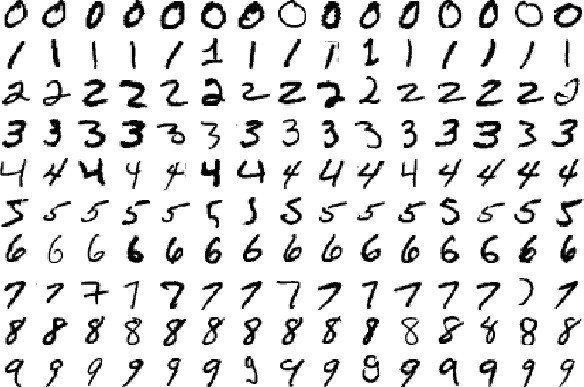

In [ ]:
#Import Libaries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the Data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

(60000, 28, 28)
(28, 28)


In [ ]:
#Building  Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
#Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Training model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2948 - accuracy: 0.9136 - val_loss: 0.1356 - val_accuracy: 0.9603
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1431 - accuracy: 0.9574 - val_loss: 0.0975 - val_accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1076 - accuracy: 0.9667 - val_loss: 0.0885 - val_accuracy: 0.9730
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9731 - val_loss: 0.0831 - val_accuracy: 0.9742
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0753 - accuracy: 0.9772 - val_loss: 0.0729 - val_accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0656 - accuracy: 0.9791 - val_loss: 0.0725 - val_accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0584 - accuracy: 0.9806 - val_loss: 0.0728 - val_accuracy:

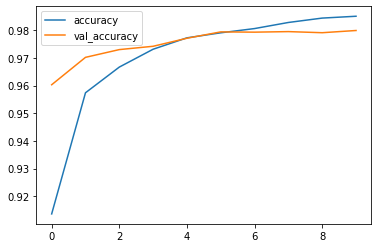

In [ ]:
#Accuracy Graph
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

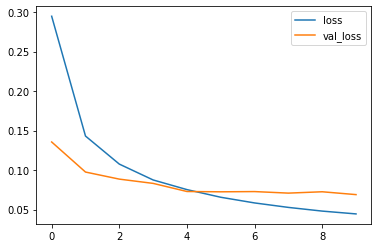

In [ ]:
#Loss Graph
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0689 - accuracy: 0.9799
[0.06891247630119324, 0.9799000024795532]


Confusion matrix without normalization
[[ 971    0    1    2    1    1    1    1    2    0]
 [   0 1125    2    1    0    0    2    1    4    0]
 [   5    2 1004    2    1    0    2   10    6    0]
 [   1    0    4  984    0    9    0    6    1    5]
 [   0    0    4    1  951    0    5    3    2   16]
 [   3    0    0    2    1  877    4    1    3    1]
 [   2    2    0    1    1    5  946    0    1    0]
 [   3    1    5    5    0    0    0 1009    0    5]
 [   5    0    1    4    3    2    0    6  949    4]
 [   2    3    0    3    4    4    1    7    2  983]]


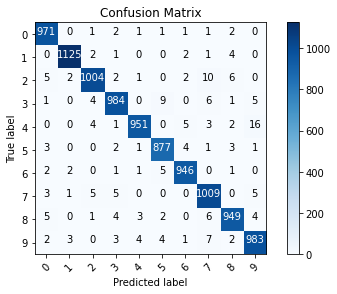

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

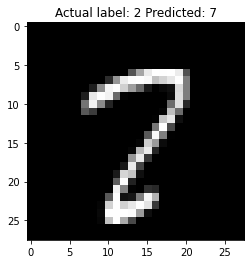

In [ ]:
#Model went wrong
array = np.where(p_test != y_test)[0]
i = np.random.choice(array)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("Actual label: %s Predicted: %s" % (y_test[i], p_test[i]));